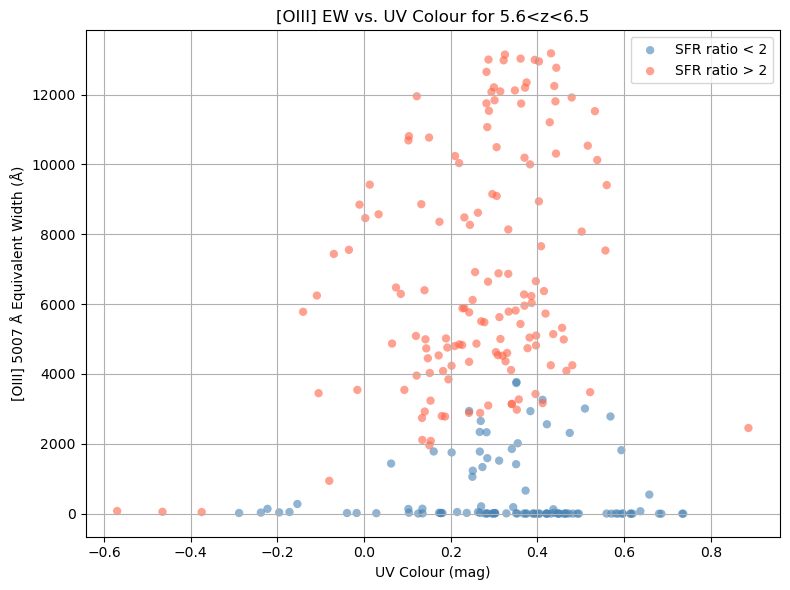

In [15]:
from astropy.io import fits
from astropy.table import Table
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Code to do plots regarding emission lines

#Plot 1: OIII  emission lines Widths against colour
#First need to import table 
hdulist = fits.open("/raid/scratch/work/Griley/GALFIND_WORK/Catalogues/v13/ACS_WFC+NIRCam/JADES-DR3-GN/(0.32)as/JADES-DR3-GN_MASTER_Sel-F277W+F356W+F444W_v13.fits")
table_pipes = Table(hdulist[1].data)
table_EAZY = Table(hdulist[3].data)
table_objects = Table(hdulist[4].data)
table_selection = Table(hdulist[6].data)
hdulist.close()


#Next, need to select only galaxies
mask = table_selection['Austin+25_EAZY_fsps_larson_zfree_0.32as'] == True
# Extract selected IDs from selection table
selected_ids = table_selection[mask]['NUMBER']
# Filter other tables by matching their corresponding ID columns
table_pipes = table_pipes[np.isin(table_pipes['#ID'], selected_ids)]
table_EAZY = table_EAZY[np.isin(table_EAZY['IDENT'], selected_ids)]
table_objects = table_objects[np.isin(table_objects['SURVEY_ID'], selected_ids)]

#defining variables
OIII_EWs = table_pipes['OIII_5007_EW_obs_50']
valid = OIII_EWs > 0
UV = table_pipes['UV_colour_50']
burstiness = table_pipes['burstiness_50']  
burstiness = burstiness[valid]

# # Plot: UV colour vs. [OIII] EW with burstiness 
# plt.figure(figsize=(8,6), facecolor='white')
# sc = plt.scatter(UV[valid], OIII_EWs[valid], c=burstiness, cmap='plasma', edgecolor='k', alpha=0.8)
# plt.xlabel("UV Colour (mag)")
# plt.ylabel("[OIII] 5007 Å Equivalent Width (Å)")
# plt.title("[OIII] EW vs. UV Colour for 5.6<z<6.5")
# plt.grid(True)
# plt.tight_layout()
# cbar = plt.colorbar(sc)
# cbar.set_label("Burstiness")
# plt.show()

#Plot: UV colour vs. [OIII] EW with PSB colour
mask_low_b = (burstiness < 2) & np.isfinite(burstiness) 
mask_high_b =  (burstiness >= 2) & np.isfinite(burstiness) 
plt.figure(figsize=(8,6), facecolor='white')
sc = plt.scatter(UV[mask_low_b], OIII_EWs[mask_low_b],color='steelblue', alpha=0.6, label='SFR ratio < 2', edgecolor='none')
sc = plt.scatter(UV[mask_high_b], OIII_EWs[mask_high_b], color='tomato', alpha=0.6, label='SFR ratio > 2', edgecolor='none')
plt.xlabel("UV Colour (mag)")
plt.ylabel("[OIII] 5007 Å Equivalent Width (Å)")
plt.title("[OIII] EW vs. UV Colour for 5.6<z<6.5")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()